<a href="https://colab.research.google.com/github/nattzza/Credit-Card-Customer-Segmenation/blob/main/ML_Day_9_Credit_Card_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features described below.

### Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

**The features:**

**customer_id** : id of the credit card holder

**balance_account** : balance amount left in the account to make purchases at the end of the 6-month period

**purchases_amount** : amount of purchases made from account

**paid_advance** : number of transactions made with “Cash in Advance” method

**full_purchases** : maximum purchase amount done in full payment

**balance_frequency_update** : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

**installments** : amount of purchases done in installments

**purchases_frequency** : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

**full_purchases_frequency** : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

**purchases_installments_frequency** : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

**cash_advance_frequency** : how frequently the cash in advance being paid

**nr_cash_advances** : cash in advance given by the user

**nr_purchases** : number of purchase transactions made

**credit_limit** : limit of credit card for user

**fixed_rate_period** : duration of fixed interest rate of credit card service for user (in months)

**payments** : amount of payment done by user

**min_payments** : minimum amount of payments made by user

**full_payment_prc** : percent of full payment paid by user

## 1. Getting and Loading the Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install sklearn

In [ ]:
#!pip install umap-learn[plot]


In [ ]:
#!pip install -U ipykernel

In [ ]:
#!pip install holoviews

In [ ]:

%matplotlib inline

# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from plotly import graph_objs as go

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE  
from umap import UMAP
from sklearn.decomposition import PCA

### Define Distribution Plots Function

In [ ]:
# DESCRIPTION --> # it plots the distributions of your data
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()
    
# How to call this function? --> plot_distrib (target_df, number_of_cols, number_of_rows, figsize)

## 2. Exploratory Data Analysis

In [ ]:
df = pd.read_csv("./card_transactions.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [ ]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [ ]:
# Checking if any id is duplicated along the df:

check_duplicated_ids = (df["customer_id"].value_counts() > 1).any()
size_of_duplicated_ids = (df["customer_id"].value_counts() > 1).sum()
print("Do we have duplicated customer id's within our df?: ", check_duplicated_ids)
print('\nHow many then?:\t', size_of_duplicated_ids if check_duplicated_ids==True else "None")

Do we have duplicated customer id's within our df?:  False

How many then?:	 None


### 2.1 Introducing Assumptions

In [ ]:
# If the power of debt payments are exluced in this analyses (if we care only to activate/promote spending of customers), the below columns could be deleted. 
# Assumption: if the legal department (debt handling team) is good in chasing the unpaid customers, then the power of debt payment can be excluded. 

# df = df.drop(columns="full_payment_prc")        # percent of full payment paid by user
# # df = df.drop(columns="min_payments")            # minimum amount of payments made by user
# df = df.drop(columns="payments")                 # amount of payment done by user
# df = df.drop(columns="fixed_rate_period")       # duration of fixed interest rate of credit card service for user (in months)
# df = df.drop(columns="nr_cash_advances")        # cash in advance given by the user
# df = df.drop(columns="cash_advance_frequency")  #  how frequently the cash in advance being paid

In [ ]:
df.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [ ]:
df['purchases_amount'].describe()

count     8500.000000
mean       999.561312
std       2154.189460
min          0.000000
25%         39.000000
50%        360.000000
75%       1105.897500
max      49039.570000
Name: purchases_amount, dtype: float64

In [ ]:
# Checking our colum values data types (str, int, float, bool):

print('\nDo we have **strings** inside of our df?:\t', (df.dtypes == "object").any(), '\n')
print('\nDo we have **integers** inside of our df?:\t', (df.dtypes == "int").any(), '\n')
print('\nDo we have **floats** inside of our df?:\t', (df.dtypes == "float64").any(), '\n')
print('\nDo we have **boolean** inside of our df?:\t', (df.dtypes == "bool").any(), '\n')


Do we have **strings** inside of our df?:	 True 


Do we have **integers** inside of our df?:	 True 


Do we have **floats** inside of our df?:	 True 


Do we have **boolean** inside of our df?:	 False 



### Checking Missing Values and NaN

In [ ]:
# Check for mising values
df.isna().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

#### Dropping Customer ID out for further processing

In [ ]:
df = df.drop(columns="customer_id")


In [ ]:
# Assign column names in the "column_name" parameter for further use 
column_name = df.columns
column_name

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

In [ ]:
# Check for NaN
df.isnull().values.any()

True

### Replacing NaN my mean in the same column

In [ ]:
# introducing impute function
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

df = imp.fit_transform(df)

df

array([[9.29840900e+00, 1.07600000e+02, 0.00000000e+00, ...,
        8.98688530e+01, 8.97116720e+01, 4.28571000e-01],
       [5.26664220e+01, 1.50300000e+02, 0.00000000e+00, ...,
        5.47225140e+01, 8.29551800e+01, 0.00000000e+00],
       [1.36079567e+03, 0.00000000e+00, 4.62861443e+02, ...,
        3.03031979e+02, 4.43781316e+02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.53887233e+02, ...,
        2.43793251e+03, 8.65594683e+02, 0.00000000e+00],
       [1.64638453e+03, 1.04734000e+03, 1.46650389e+02, ...,
        4.62848132e+02, 4.97408854e+02, 0.00000000e+00],
       [1.86108737e+03, 1.75206000e+03, 0.00000000e+00, ...,
        7.37941555e+02, 4.37075647e+02, 0.00000000e+00]])

In [ ]:
df.shape

(8500, 17)

In [ ]:
# The above df has became an array and without any column name
# We have to convert the array into a dataframe and add the column names back 

df_df = pd.DataFrame(df, columns=column_name)  # convert from aarray to dataframe
df_df

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1.0,0.0,8500.0,12.0,662.387331,260.277533,0.000000
8496,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0.0,11.0,1500.0,12.0,141.974905,150.500248,0.166667
8497,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1.0,0.0,500.0,9.0,2437.932505,865.594683,0.000000
8498,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2.0,51.0,3000.0,12.0,462.848132,497.408854,0.000000


In [ ]:
# Check for NaN
df_df.isnull().values.any()

False

In [ ]:
# Check for mising values
df_df.isna().sum()

balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [ ]:
df_df.min_payments.unique()  

array([ 89.711672,  82.95518 , 443.781316, ..., 150.500248, 497.408854,
       437.075647])

In [ ]:
df_df.min_payments.unique().shape

(8202,)

Visualize Sales vs. Order Date

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# sns.lineplot(x=df_df['customer_id'], y=df_df['purchases_amount']);

### 2.2 Data Vistualization

### Visualization of the data: Correlation Heatmap

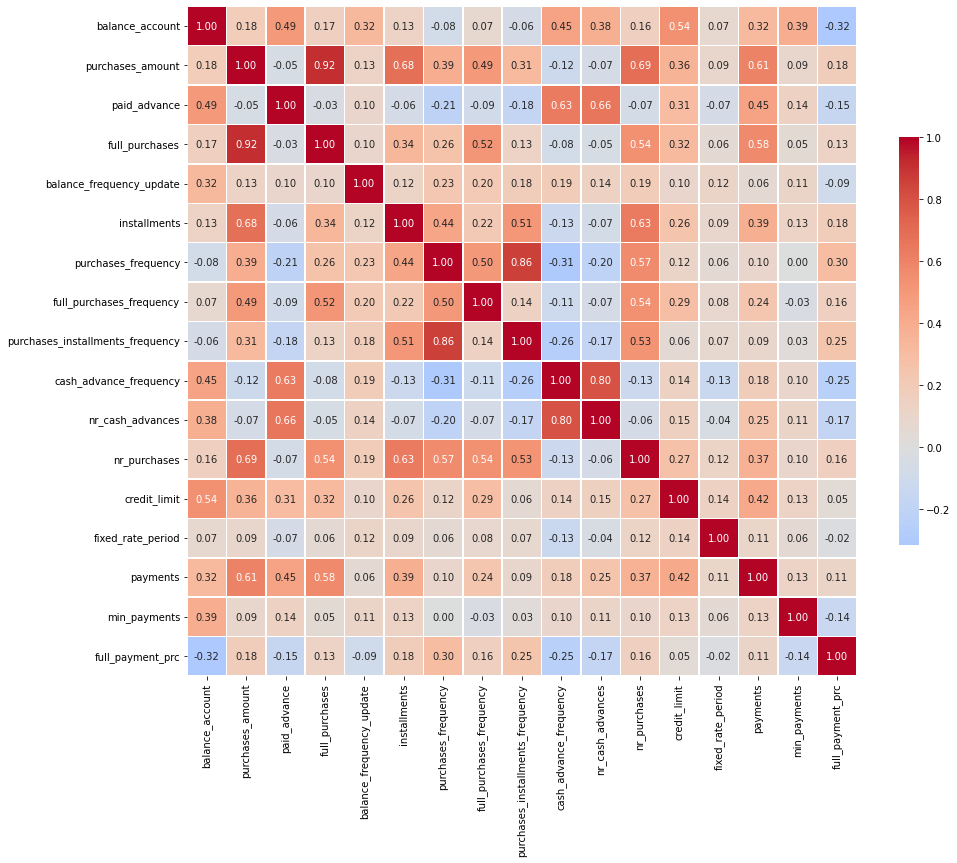

In [ ]:
corr = df_df.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(15, 15)) # setting up the empty plot to use next

# Assembly of the heatmap:
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

### Visualization of the data: Histograms

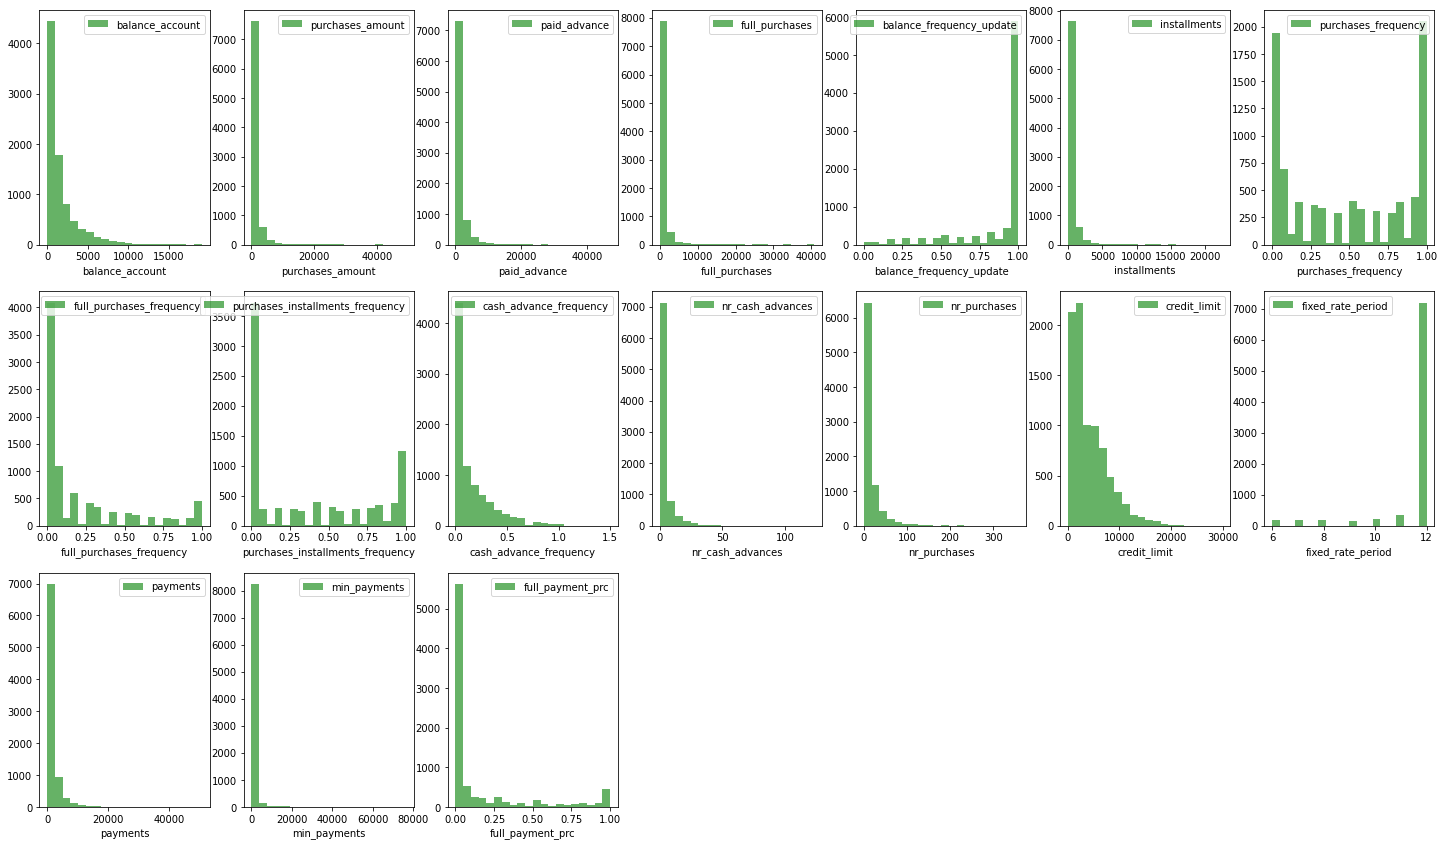

In [ ]:
plot_distrib(df_df, ncols=7, nrows=5, figsize=(25, 25)) 
# calling the function we defined at the beginning of this notebook

Visualization of the data: Boxplot

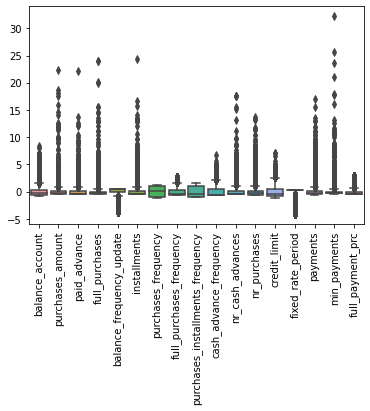

<Figure size 1080x1080 with 0 Axes>

In [ ]:
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
data_scaled = pd.DataFrame(scaler.fit_transform(df_df), columns=df_df.columns)
ax = sns.boxplot(data=data_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.figure(figsize=(15,15))
plt.show()

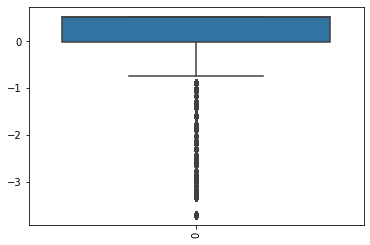

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
#data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
ax = sns.boxplot(data=data_scaled["balance_frequency_update"])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.figure(figsize=(15,15))
plt.show()

### Recap the Feature names and description
**The features:**

**customer_id** : id of the credit card holder

**balance_account** : balance amount left in the account to make purchases at the end of the 6-month period

**purchases_amount** : amount of purchases made from account

**paid_advance** : number of transactions made with “Cash in Advance” method

**full_purchases** : maximum purchase amount done in full payment

**balance_frequency_update** : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

**installments** : amount of purchases done in installments

**purchases_frequency** : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

**full_purchases_frequency** : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

**purchases_installments_frequency** : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

**cash_advance_frequency** : how frequently the cash in advance being paid

**nr_cash_advances** : cash in advance given by the user

**nr_purchases** : number of purchase transactions made

**credit_limit** : limit of credit card for user

**fixed_rate_period** : duration of fixed interest rate of credit card service for user (in months)

**payments** : amount of payment done by user

**min_payments** : minimum amount of payments made by user

**full_payment_prc** : percent of full payment paid by user

### Data interpreation from the histogram and box plot

#### **Feature meaning**: 
**purchases_frequency** : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

**Purchases Frequency** There are hardly outliers shown in the box plot. This suggests that majorities of credit card holders do make the most frequent and another majority group hardly purchase anything. 

Now I want to see correlation between purchance frequency and amount of purchace. Especially at the lowest range of purchace frequency. 



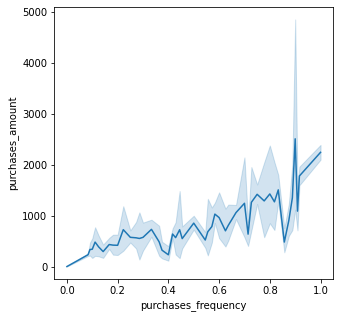

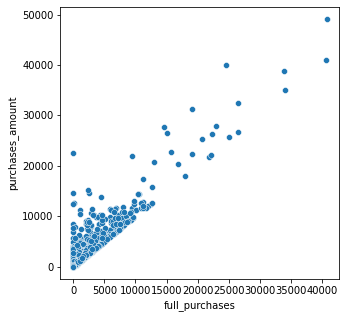

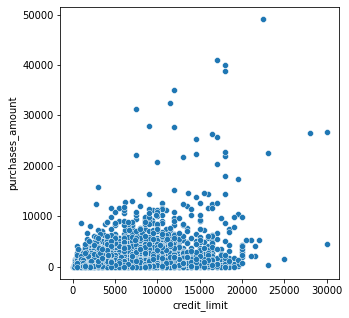

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# sns.lineplot(x=df['customer_id'], y=df['purchases_amount']);
sns.lineplot(x=df_df['purchases_frequency'], y=df_df['purchases_amount']);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(x=df_df['full_purchases'], y=df_df['purchases_amount']);
# ax.plot([0, 40000], [0, 4000], "-", linewidh=0.5, color = "orange", zorder=10)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.scatterplot(x=df_df['credit_limit'], y=df_df['purchases_amount']);

## 4. Dimensionality Reduction for Visualisation



### 4.1 Scatter Visualization in 2-D: Using Uniform Manifold Approximation and Projection (UMAP)

Scatter Visualization in 2-D: Using Uniform Manifold Approximation and Projection (UMAP)

The biggest advantage of UMAP over t-SNE is the more optimal balance between local and global structure and the computational efficiency

https://umap-learn.readthedocs.io/en/latest/

UMAP Parameters:

**n_neighbors** = parameter to control how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data.

This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

**n_components** = the dimensionality of the reduced dimension space we will be embedding the data into

**min_dist** = parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation.

In [ ]:
# UMAP Definition:
umap_embeddings = UMAP(n_neighbors=8, n_components=13,  min_dist= 0.01)

# Good combination: 
# (n_neighbors=8, n_components=13,  min_dist= 0.01)


In [ ]:
# Fit_Transform:
X_umap = umap_embeddings.fit_transform(df_df)

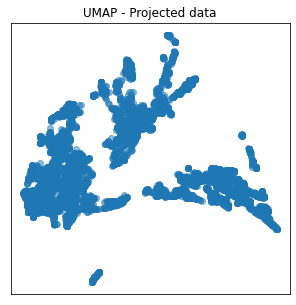

In [206]:
# Plot Result of UMAP:

fig = plt.figure(figsize =(5, 5))

# plot projected roll
ax = fig.add_subplot()
ax.scatter(X_umap[:, 0], X_umap[:, 1],cmap=plt.cm.Spectral, alpha=0.5)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('UMAP - Projected data')
plt.show()


## 3. Application of Clustering Techniques

### 3.1 Clustering: K-Means

In [ ]:
r_seed = 20  # random seed to use during modeling for reproducability purposes

In [ ]:
# NOTE: THIS TAKES 5 MINUTES TO RUN

cluster_errors = []
for i in range(1, 15):
    n_clusters = i
    pipe_umap_kmean = Pipeline(
        [
            ("scl", StandardScaler()), 
            ("UMAP", UMAP(n_neighbors=8, n_components=13,  min_dist= 0.01)), 
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, n_jobs=-1))] # n_jobs=-1 
    )
    pipe_umap_kmean.fit(df_df)
    pipe_umap_kmean.predict(df_df)
    cluster_errors.append(pipe_umap_kmean.named_steps["cluster"].inertia_)    

### 3.1.1 Finding the optimal number of clusters: Elbow Method

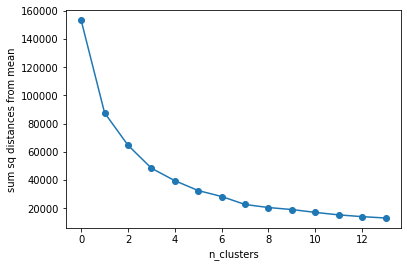

In [ ]:

plt.clf()
plt.plot(cluster_errors, "o-")

plt.xlabel("n_clusters")
plt.ylabel("sum sq distances from mean")
plt.show()

#### From this Elbow plot, it can be suggested that 3-4 clusters are sufficient

---



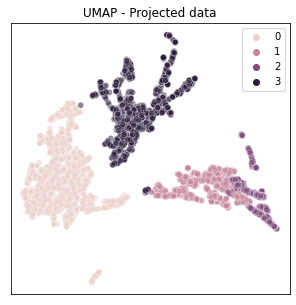

In [194]:
n_optimal = 4
# pipe_umap_kmean.set_params(cluster__n_clusters=n_optimal)
# pipe_umap_kmean.fit(df_df)
# labels = pipe_umap_kmean['cluster'].labels_

kmean = KMeans(n_clusters=n_optimal)
kmean.fit(X_umap)
labels = kmean.labels_

# plot UMAP with labels
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot()
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.5, hue=labels, ax=ax)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('UMAP - Projected data')
plt.show()

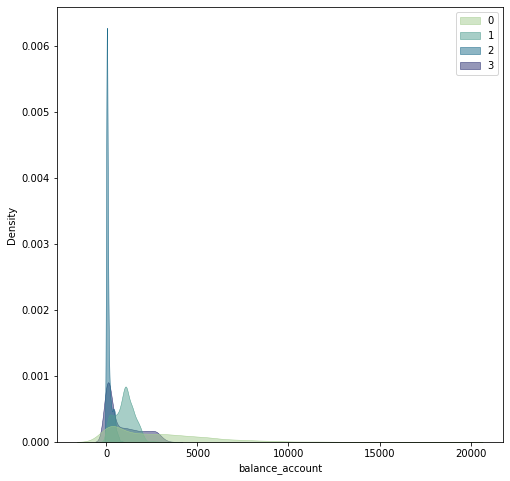

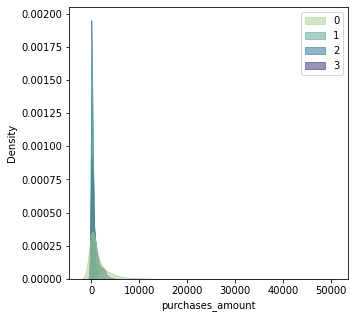

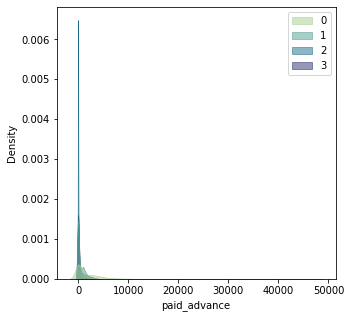

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.kdeplot(data=df_df, x="balance_account", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="purchases_amount", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="paid_advance", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);


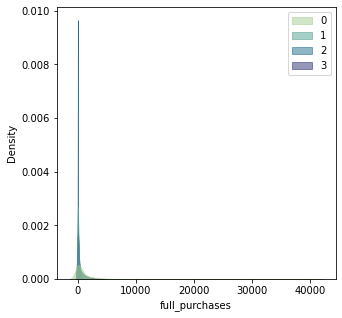

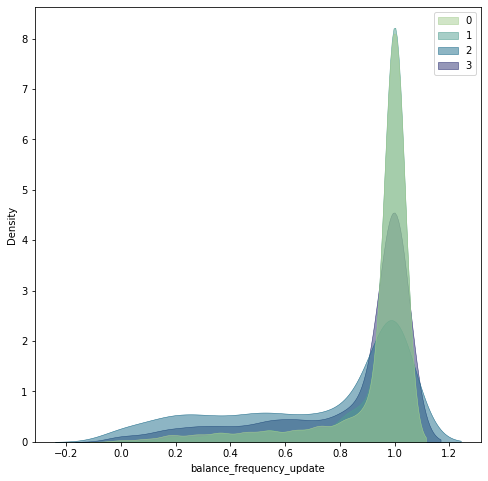

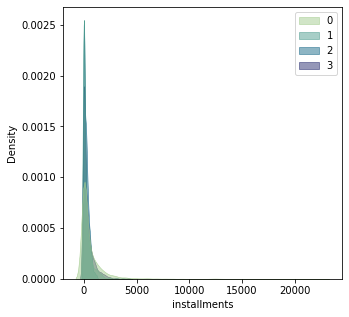

In [237]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="full_purchases", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.kdeplot(data=df_df, x="balance_frequency_update", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="installments", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);

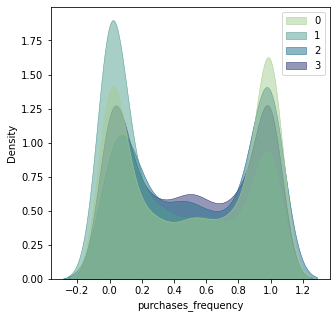

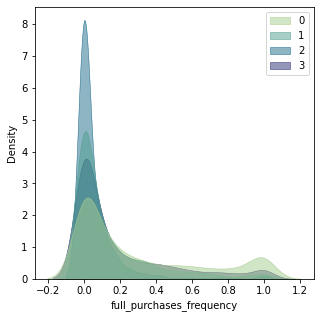

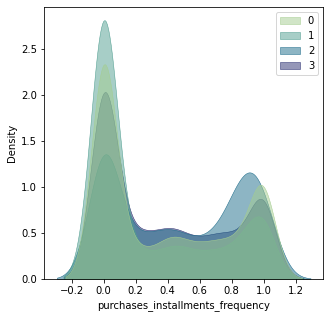

In [223]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="purchases_frequency", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="full_purchases_frequency", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="purchases_installments_frequency", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);

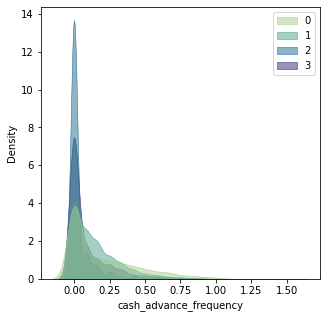

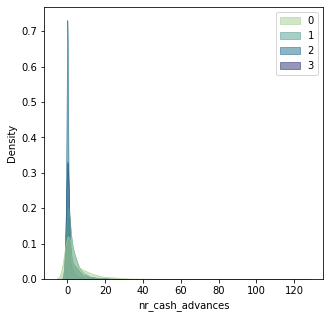

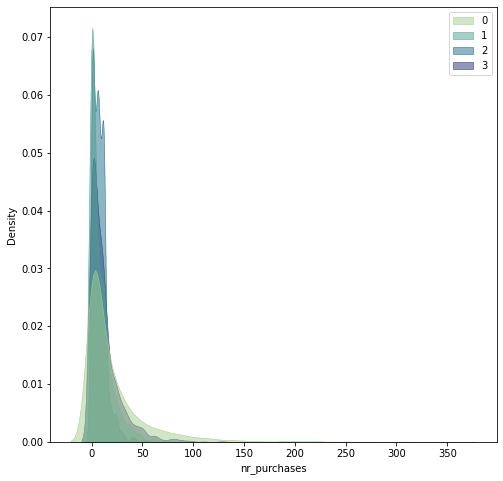

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="cash_advance_frequency", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="nr_cash_advances", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.kdeplot(data=df_df, x="nr_purchases", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);

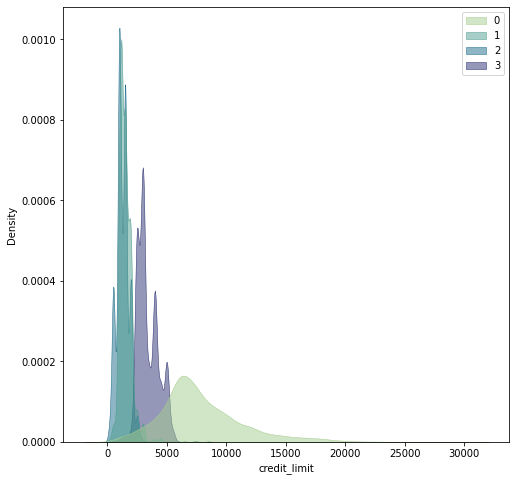

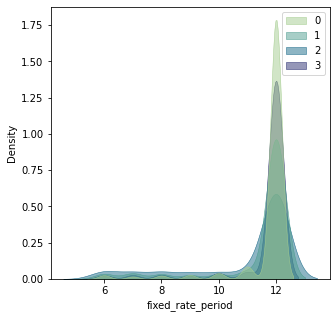

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.kdeplot(data=df_df, x="credit_limit", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="fixed_rate_period", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);

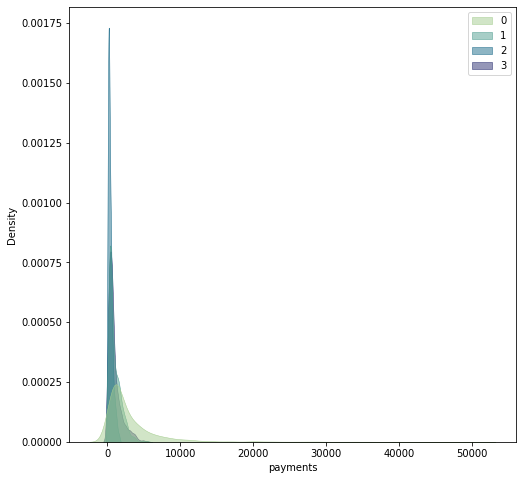

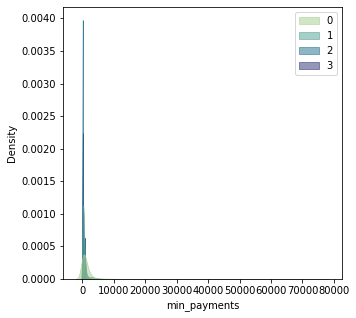

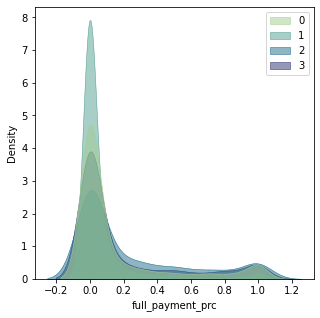

In [239]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.kdeplot(data=df_df, x="payments", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="min_payments", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.kdeplot(data=df_df, x="full_payment_prc", hue=labels, fill=True, common_norm=False, palette="crest", alpha=.5, linewidth=0.5);

In [195]:
df_df.shape

(8500, 17)

In [199]:
df_df.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0.0,10.0,1000.0,11.0,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,6.0,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6.0,0.0,1500.0,11.0,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,13.0,2000.0,12.0,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3.0,1.0,2500.0,12.0,4094.261427,40.142262,0.000000


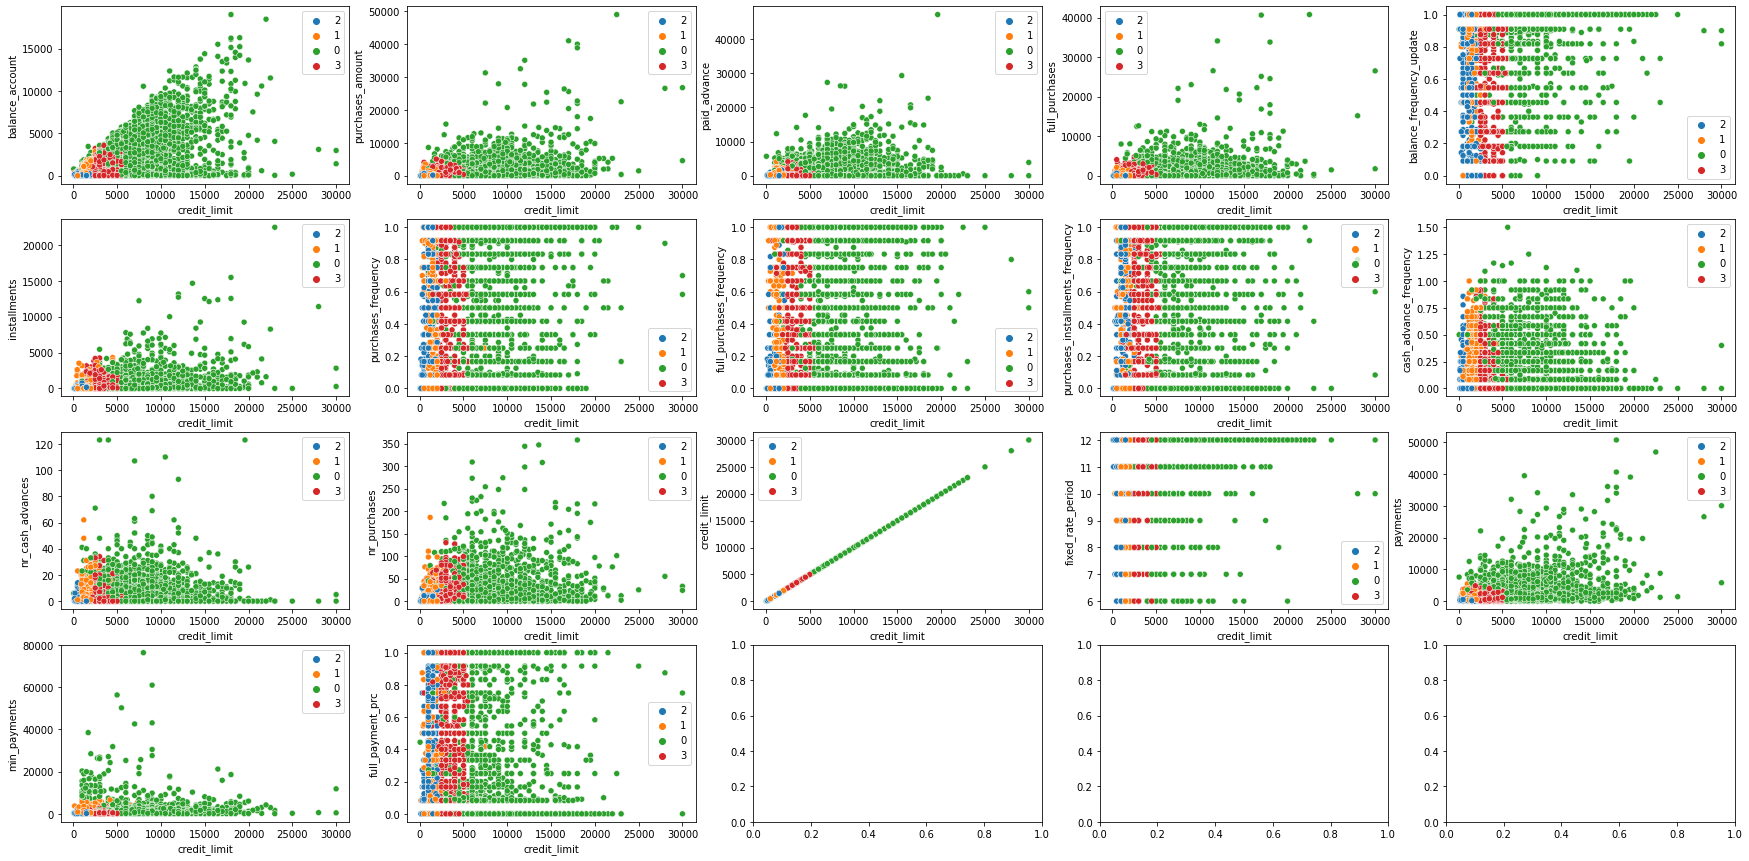

In [230]:
fig, axes = plt.subplots(4, 5, figsize=(30, 15))

cols = [df_df.columns.to_list()[0]] + df_df.columns.to_list()[1:18]
for col, ax in zip(cols, axes.ravel()):
  sns.scatterplot(x='credit_limit', y=col, data=df_df, hue=[str(x) for x in labels], ax=ax)
  # ax.set_title(col)
plt.show()

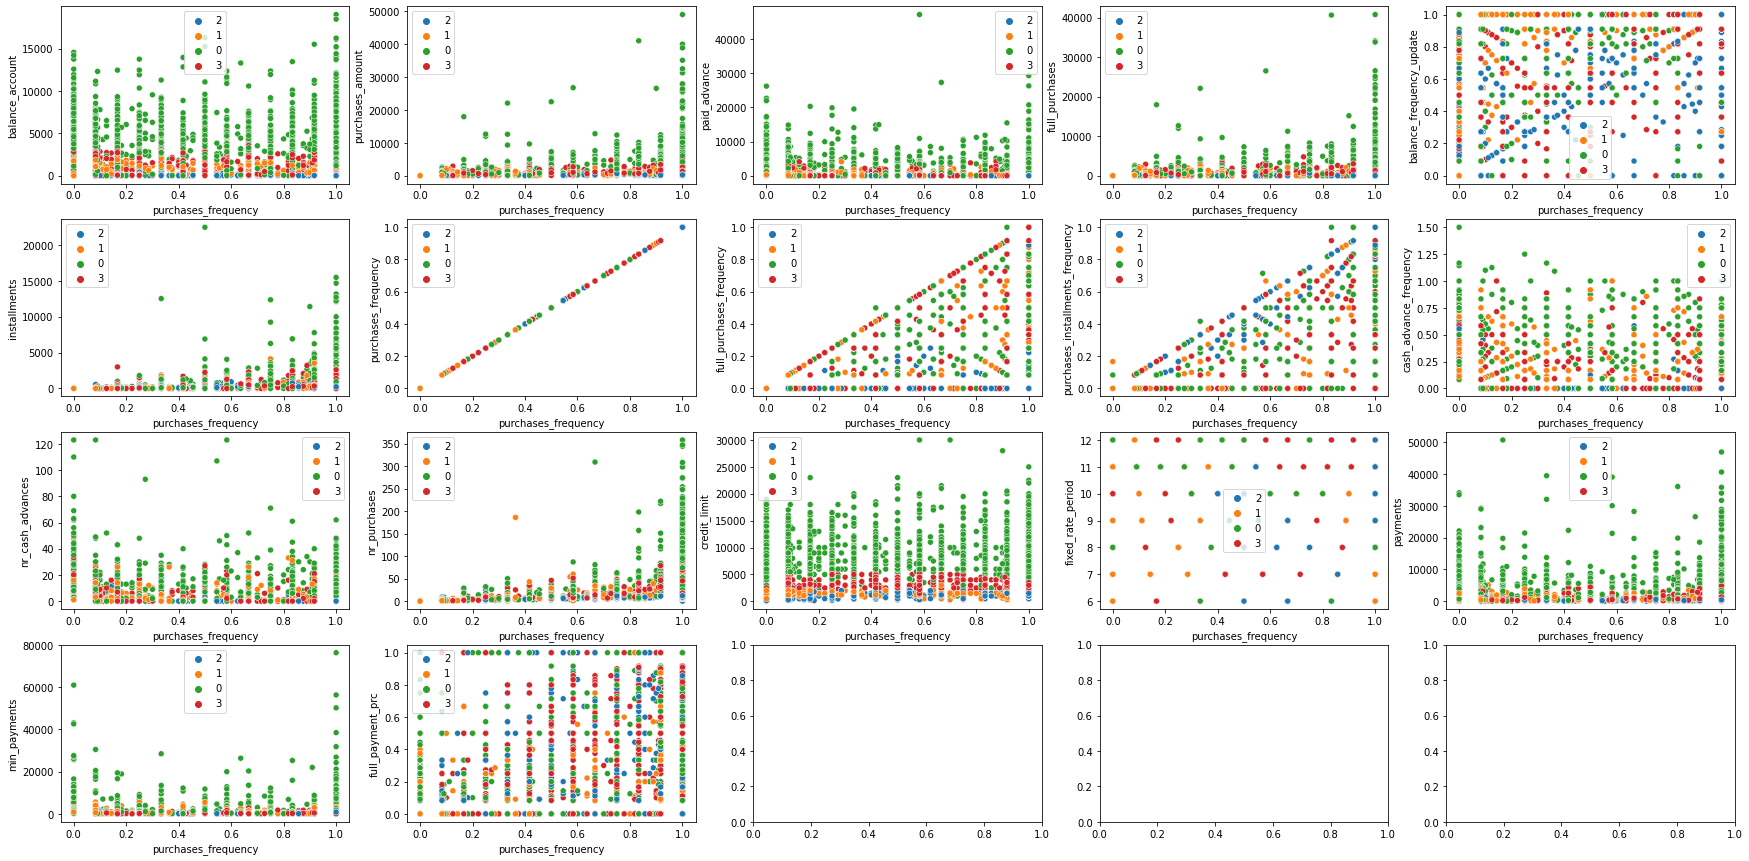

In [231]:
fig, axes = plt.subplots(4, 5, figsize=(30, 15))

cols = [df_df.columns.to_list()[0]] + df_df.columns.to_list()[1:18]
for col, ax in zip(cols, axes.ravel()):
  sns.scatterplot(x='purchases_frequency', y=col, data=df_df, hue=[str(x) for x in labels], ax=ax)
  # ax.set_title(col)
plt.show()

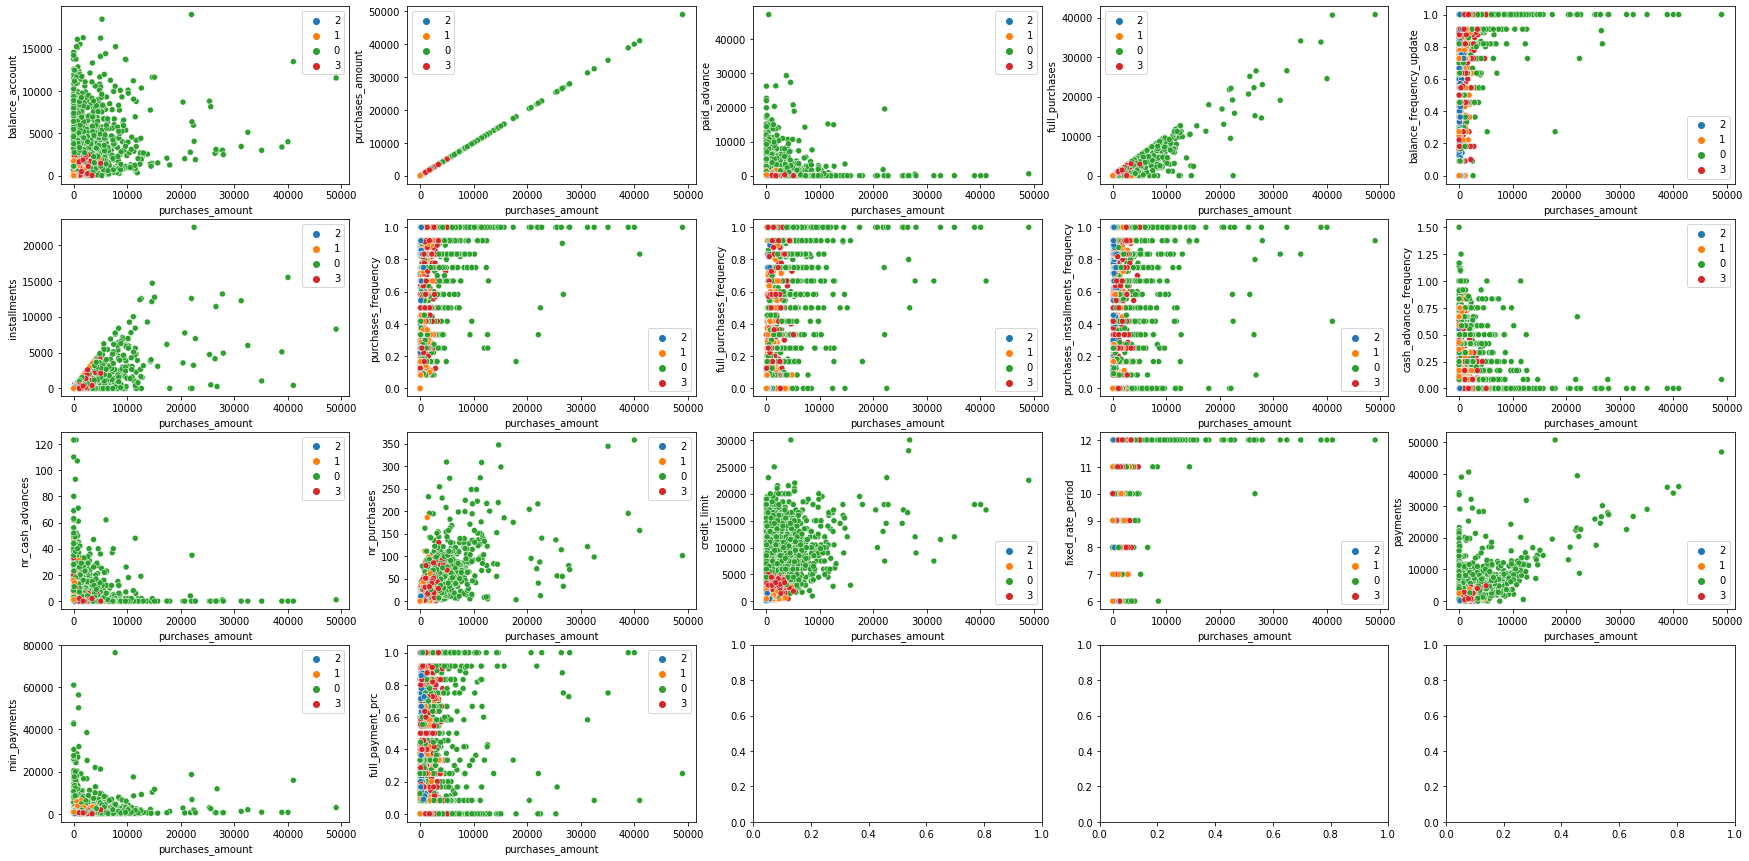

In [232]:
fig, axes = plt.subplots(4, 5, figsize=(30, 15))

cols = [df_df.columns.to_list()[0]] + df_df.columns.to_list()[1:18]
for col, ax in zip(cols, axes.ravel()):
  sns.scatterplot(x='purchases_amount', y=col, data=df_df, hue=[str(x) for x in labels], ax=ax)
  # ax.set_title(col)
plt.show()

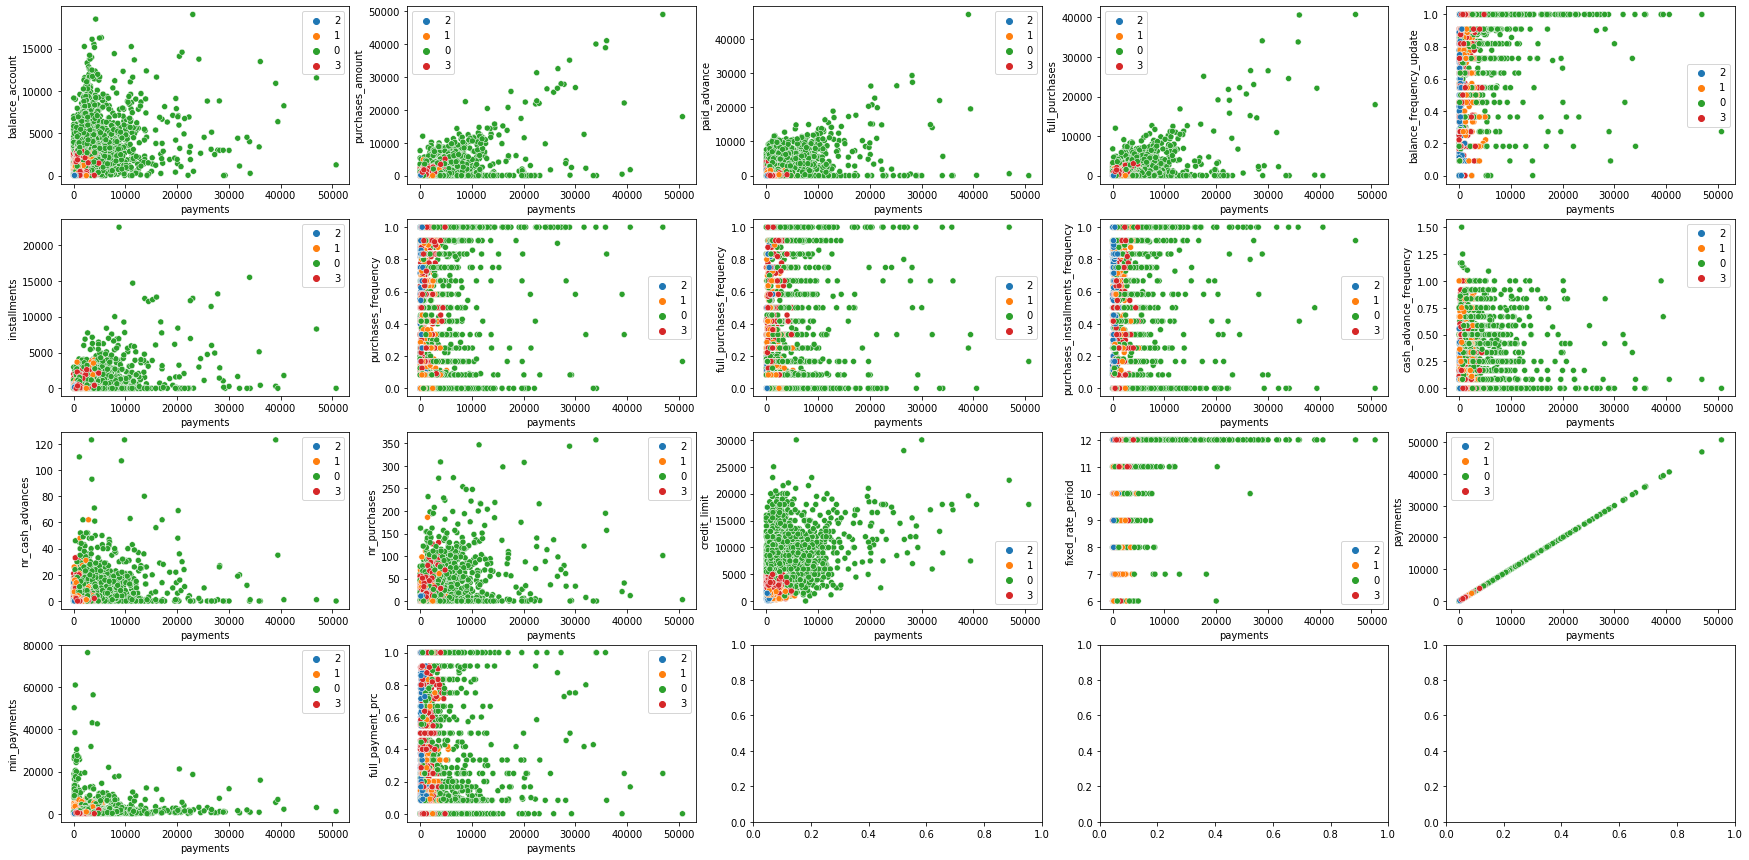

In [233]:
fig, axes = plt.subplots(4, 5, figsize=(30, 15))

cols = [df_df.columns.to_list()[0]] + df_df.columns.to_list()[1:18]
for col, ax in zip(cols, axes.ravel()):
  sns.scatterplot(x='payments', y=col, data=df_df, hue=[str(x) for x in labels], ax=ax)
  # ax.set_title(col)
plt.show()